# Tests with different dataset sizes

In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/antonismand/Desktop/Personalized-News-Recommendation'

In [2]:
%load_ext autoreload
%autoreload 2
from bandits import *
from evaluator import evaluate
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502","dataset/R6/ydata-fp-td-clicks-v1_0.20090503","dataset/R6/ydata-fp-td-clicks-v1_0.20090509")
dataset.get_yahoo_events(files)

11264756 events with 106 articles
CPU times: user 6min 27s, sys: 14.6 s, total: 6min 41s
Wall time: 6min 48s


In [4]:
_, deploy = evaluate(Egreedy(1))
rnd_ctr = deploy[-1]

Egreedy (ε=1)       0.0298    22.2s


Egreedy (ε=0.1)     0.0418    28.9s
Egreedy (ε=0.1)     0.0421    20.3s
Egreedy (ε=0.1)     0.0448    12.2s
Egreedy (ε=0.1)     0.0452    6.1s


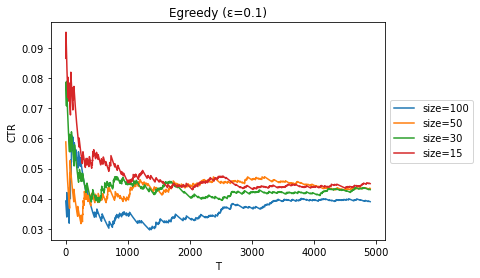

UCB1 (α=0.1)        0.0449    1.0m
UCB1 (α=0.1)        0.0433    36.7s
UCB1 (α=0.1)        0.0482    21.8s
UCB1 (α=0.1)        0.0466    11.2s


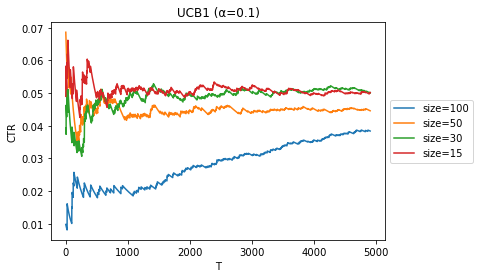

LinUCB (α=0.3, context:both)0.0503    8.1m
LinUCB (α=0.3, context:both)0.0518    4.8m
LinUCB (α=0.3, context:both)0.0526    2.9m
LinUCB (α=0.3, context:both)0.0537    1.6m


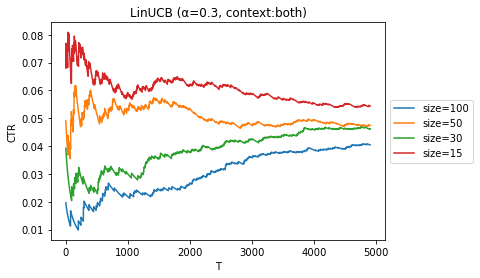

LinUCB (α=0.3, context:user)0.0489    7.4m
LinUCB (α=0.3, context:user)0.0522    4.2m
LinUCB (α=0.3, context:user)0.0529    2.4m
LinUCB (α=0.3, context:user)0.0536    1.2m


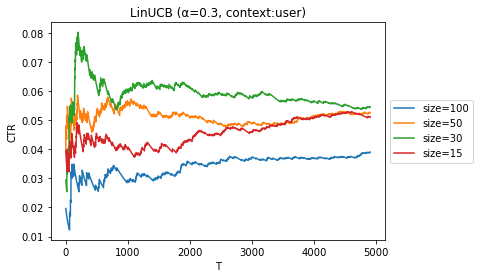

In [5]:
sizes = [100,50,30,15]
results = [['Size','Bucket','Algorithm','CTR Lift']]

algorithms = [Egreedy(0.1),Ucb1(0.1),LinUCB(0.3, context="both"), LinUCB(0.3, context="user")]

for test in algorithms:
    for size in sizes:
        learn ,deploy = evaluate(test,size=size)
        results.append([size,'learn',test.algorithm, learn[-1]/rnd_ctr])
        results.append([size,'deploy',test.algorithm, deploy[-1]/rnd_ctr])
        
        plt.plot(deploy[100:5000], label="size={}".format(size))
        
    plt.title(test.algorithm)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [6]:
df = pd.DataFrame(results)
df.columns = df.iloc[0]
df = df[1:]
df

,Size,Bucket,Algorithm,CTR Lift
1,100,learn,Egreedy (ε=0.1),1.425223
2,100,deploy,Egreedy (ε=0.1),1.406137
3,50,learn,Egreedy (ε=0.1),1.439401
4,50,deploy,Egreedy (ε=0.1),1.413857
5,30,learn,Egreedy (ε=0.1),1.422329
6,30,deploy,Egreedy (ε=0.1),1.507054
7,15,learn,Egreedy (ε=0.1),1.423876
8,15,deploy,Egreedy (ε=0.1),1.520571
9,100,learn,UCB1 (α=0.1),1.472481
10,100,deploy,UCB1 (α=0.1),1.508754
